In [1]:
import pandas as pd
import numpy as np
from ast import literal_eval
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
data_df = pd.read_csv("../kham_pha_du_lieu/animals_split_info.csv", index_col = 0)
#                       usecols = ['Name', 'Population trend', 'Population status'])

/tmp/ipykernel_1441/4159428551.py:1: DtypeWarning: Columns (4,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv("../kham_pha_du_lieu/animals_split_info.csv", index_col = 0)


In [3]:
data_df.head()

,Name,Kingdom,Phylum,Subphylum,Class,Order,Suborder,Family,Genus,Species,Population size,Life span,Top speed,Weight,Height,Length,Introduced countries,Seas,Islands,Biome,Climate,Predators,Bird's call,Mating behavior,Reproduction season,Pregnancy duration,Baby carrying,Independent age,Female name,Male name,Baby name,Incubation period,Population trend,Population status,Attributes,Continents,Subcontinents,Countries,Regions,Wwf biomes,Group name,Diet,Biogeographical realms,Lifestyle,Oceans,Seasonal behavior
0,Grey Wolf,Animalia,Chordata,Vertebrata,Mammalia,Carnivora,Caniformia,Canidae,Canis,Canis lupus,"400,000",10-20 yrs,75 km/h,16-60 kg,80-85 cm,105-160 cm,NaN,NaN,NaN,"['Wetlands ', 'Shrubland', 'Forest', 'Mountain...","['Temperate', 'Cold', 'Polar', 'Tropical']",NaN,NaN,Monogamy,January-April,60-63 days,1-14 pups,45 days,bitch,dog,"pup, whelp",NaN,Stable,Least concern (LC),"['Nocturnal', 'Carnivore', 'Scavenger', 'Terre...","['Asia', ' Europe', ' North America', ' Africa']","['South Asia', ' Western Asia', ' Southeast As...","['Albania', ' Armenia', ' Azerbaijan', ' Belar...","['Czech Republic', ' Estonia', ' Finland', ' F...","['Nearctic', ' Palearctic', ' Indomalayan', ' ...","['pack', ' route', ' rout']","['Carnivore', '', 'Scavenger']",['Greenland'],"['Terrestrial', ' Cursorial', ' Altricial', ' ...",[],['Not a migrant']
1,Tiger,Animalia,Chordata,Vertebrata,Mammalia,Carnivora,Feliformia,Felidae,Panthera,Panthera tigris,"2,154-3,159",10-15 yrs,96 km/h,65-306 kg,NaN,200-390 cm,NaN,NaN,NaN,"['Forest', 'Rainforest', 'Montane forest', 'Ri...","['Tropical', 'Temperate']",NaN,NaN,Polygyny,November-April,103 days,1-7 cubs,18 mos-3 yrs,NaN,NaN,cub,NaN,Decreasing,Endangered (EN),"['Nocturnal', 'Carnivore', 'Cursorial', 'Terre...",['Asia'],"['South Asia', ' Southeast Asia', ' East Asia']","['Bangladesh', ' Bhutan', ' China', '', ' Indi...",['Thailand'],"['Palearctic', ' Indomalayan']",[],['Carnivore'],"['Tibet', ' Yunnan']","['Cursorial', ' Terrestrial', ' Ambush predato...",[],['Not a migrant']
2,Brown Bear,Animalia,Chordata,Vertebrata,Mammalia,Carnivora,Caniformia,Ursidae,Ursus,Ursus arctos,"200,000",20-50 yrs,56 km/h,100-635 kg,70-153 cm,1.4-2.8 m,NaN,NaN,NaN,"['Forest', 'Woodland']","['Temperate', 'Cold', 'Polar']",NaN,NaN,"Polygynandry,",May-July,8 weeks,1-4 cubs,2-4 years,sow,boar,cub,NaN,Stable,Least concern (LC),"['Crepuscular', 'Omnivore', 'Terrestrial', 'Al...","['Asia', ' Europe', ' North America']","['South Asia', ' Western Asia', ' East Asia', ...","['Albania', ' Armenia', ' Austria', ' Azerbaij...",[],"['Nearctic', ' Palearctic', ' Indomalayan']","['sloth', ' sleuth']",['Omnivore'],"['Estonia', ' Finland', ' France', ' Georgia',...","['Terrestrial', ' Altricial', ' Nomadic', ' Te...",[],"['Hibernating', ' Migrating']"
3,Blue Whale,Animalia,Chordata,Vertebrata,Mammalia,Artiodactyla,NaN,Balaenopteridae,Balaenoptera,Balaenoptera musculus,10-25 Thou,80-90 yrs,20 km/h,100-160 t,NaN,25-30 m,NaN,NaN,NaN,"['Oceanic pelagic zone', 'Marine', 'Neritic zo...","['Tropical', 'Temperate', 'Cold', 'Polar']",NaN,NaN,Monogamy,winter or early spring,1 year,1 calf,8 months,cow,bull,calf,NaN,Increasing,Endangered (EN),"['Carnivore', 'Piscivores', 'Aquatic', 'Precoc...","['Africa', ' South America', ' Oceania', ' Nor...","['Sub-Saharan Africa', ' Caribbean Islands', '...","['Angola', ' Argentina', ' Australia', ' Baham...","['Chile', ' China', ' Colombia', ' Comoros', '...",[],"['pod', ' gam', ' herd', ' school', ' mod']","['Carnivore', '', 'Piscivores']","['Atlantic Ocean', ' Pacific Ocean']","['Aquatic', ' Precocial', ' Natatorial', ' Viv...","['Greenland', ' Kamchatka']",['Migrating']
4,Killer Whale,Animalia,Chordata,Vertebrata,Mammalia,Artiodactyla,NaN,Delphinidae,Orcinus,Orcinus orca,"50,000",30-100 yrs,45 km/h,3-6 t,NaN,6-9 m,NaN,NaN,NaN,"['Oceanic pelagic zone', 'Marine', 'Neritic zo...","['Tropical', 'Temperate', 'Cold', 'Polar']",NaN,NaN,Polygynandry,"year-round, usually in summer",15-18 months,1 calf,2 years,cow,bull,calf,NaN,NaN,Na

In [4]:
data_df.shape

(29357, 46)

In [5]:
def values(col, array):
    temp = array[col].values.tolist()
    temp = [x for x in temp if type(x) != float]
    temp = np.unique(temp, return_counts=True)
    temp = pd.Series(data = temp[1], index = temp[0])
    return temp

Text(0.5, 1.0, 'Biểu đồ thống kê số lượng loài theo xu hướng phát triển về kích thước quần thể')

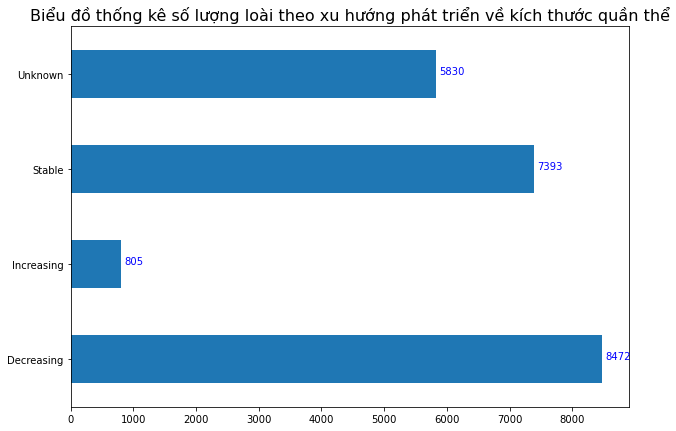

In [40]:
trend = values('Population trend', data_df)
trend.plot(kind = 'barh', figsize = (10, 7))
for index, value in enumerate(trend.values.tolist()):
    plt.text(value + 50, index, str(value), color = 'blue')
plt.title('Biểu đồ thống kê số lượng loài theo xu hướng phát triển về kích thước quần thể', fontsize = 16)

Text(0.5, 1.0, 'Biểu đồ thống kê số lượng loài theo phân loại')

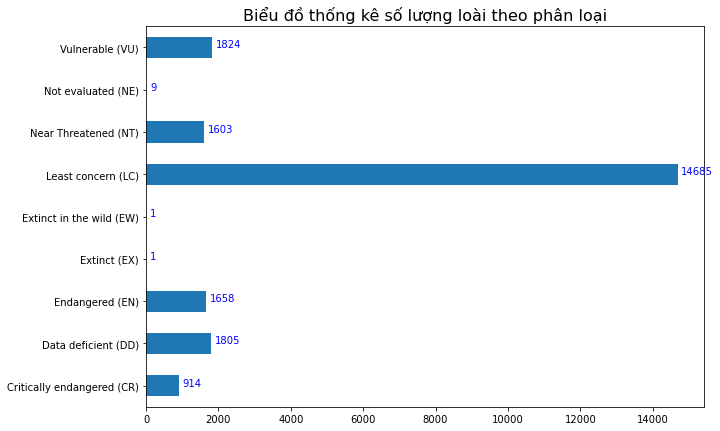

In [41]:
status = values('Population status', data_df)
status.plot(kind = 'barh', figsize = (10, 7))
for index, value in enumerate(status.values.tolist()):
    plt.text(value + 100, index, str(value), color = 'blue')
plt.title('Biểu đồ thống kê số lượng loài theo phân loại', fontsize = 16)

In [8]:
data = data_df.groupby(['Population trend', 'Population status'])['Name'].count().reset_index(name = 'count')
# data

In [9]:
stat_count = data_df.groupby(['Population trend', 'Population status'])['Name'].count().reset_index(name = 'count')
stat_count = stat_count.sort_values(by=['Population trend', 'Population status'])
stat_count.columns = ['trend', 'status', 'count']
# stat_count

In [10]:
test = trend.index.tolist()
test = np.repeat(test, len(status.index)).tolist()
test = np.array([test, status.index.tolist() * len(trend.index)]).T
# test

In [11]:
data = pd.DataFrame(data = test)
data.columns = ['trend', 'status']

In [12]:
merge_data = pd.merge(stat_count, data, how = 'right').fillna(0)
# merge_data

Text(0.5, 1.0, 'Biểu đồ tỉ trọng xu hướng phát triển về độ lớn của kích thước quần thể')

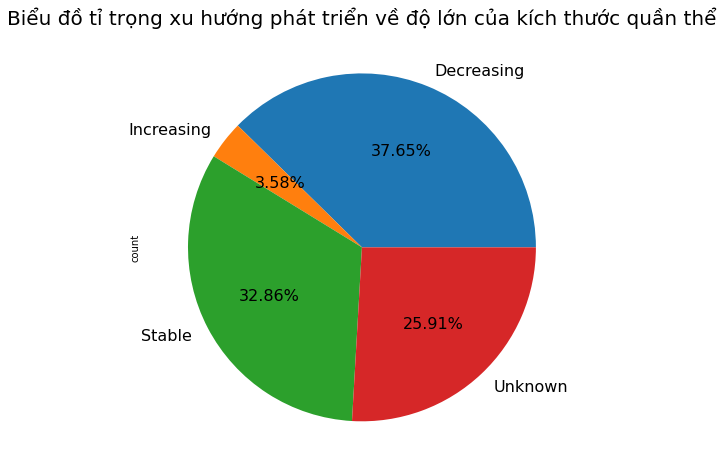

In [13]:
merge_data.groupby(['trend'])['count'].sum().plot(kind = 'pie', autopct='%1.2f%%', figsize = (8, 8), fontsize = 16)
plt.title('Biểu đồ tỉ trọng xu hướng phát triển về độ lớn của kích thước quần thể', fontsize = 20, loc = 'center')

Text(0.5, 0.98, 'Biểu đồ tỉ trọng của phân loại động vật theo từng xu hướng tăng giảm')

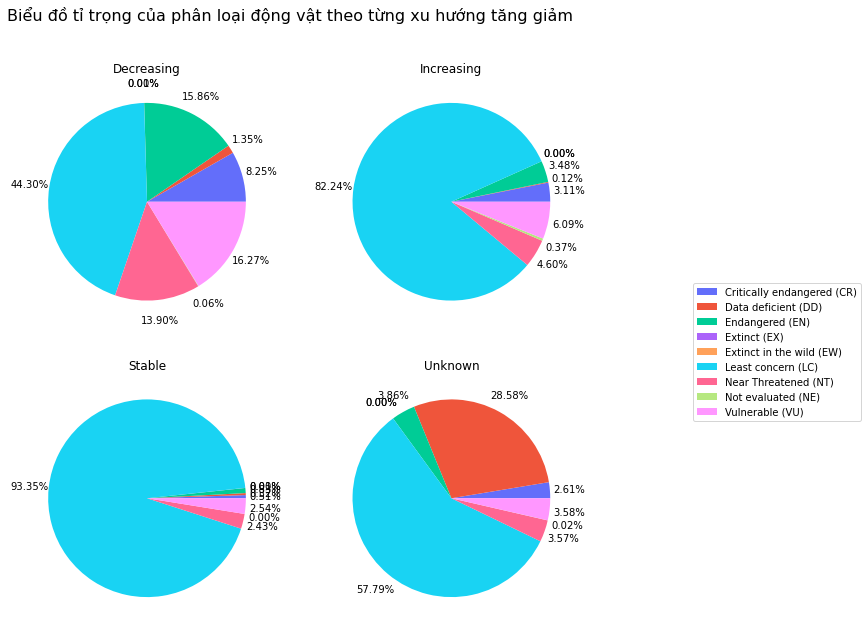

In [14]:
colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF']
fig, ax = plt.subplots(2, 2, figsize = (10, 10))
for i in range(len(trend.index)):
    temp = merge_data[merge_data['trend'] == trend.index[i]]
#     ax[i // 2][i % 2].pie(temp['count'], labels = temp['status'])
    ax[i // 2][i % 2].pie(temp['count'], autopct='%.2f%%', labels = None, pctdistance=1.2, colors = colors)
    ax[i // 2][i % 2].set_title(trend.index[i])
fig.legend(labels = status.index, loc="right", bbox_to_anchor=(1.3, 0.5))
fig.suptitle('Biểu đồ tỉ trọng của phân loại động vật theo từng xu hướng tăng giảm', fontsize = 16)

In [15]:
new_status = pd.read_csv('new_status.csv')
new_status.columns = ['status', 'new_status']
merge_data = pd.merge(merge_data, new_status)

In [16]:
new_status = new_status['new_status'].values.tolist()
new_status = np.unique(new_status)
new_status

array(['Extinct', 'Lower risk', 'Not fully assessed', 'Threatened'],
      dtype='<U18')

Text(0.5, 0.98, 'Biểu đồ tỉ trọng của phân loại động vật theo từng xu hướng tăng giảm')

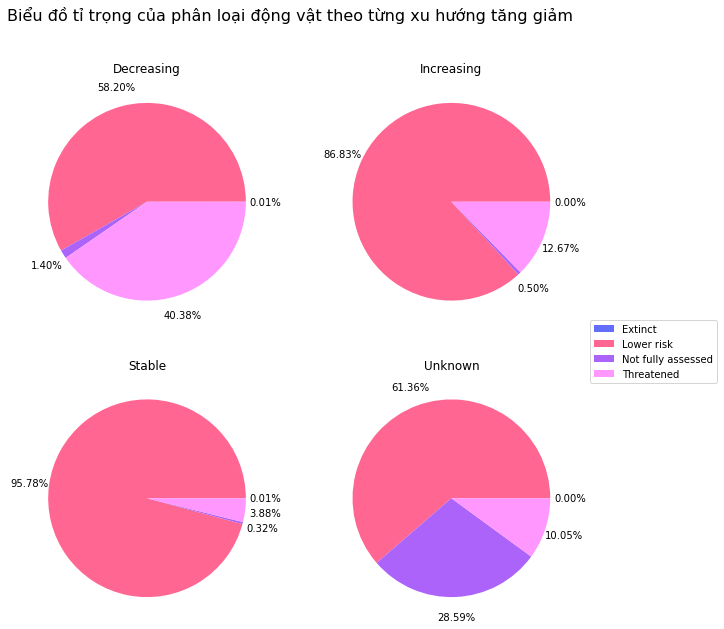

In [17]:
colors = ['#636EFA', '#FF6692', '#AB63FA', '#FF97FF']
fig, ax = plt.subplots(2, 2, figsize = (10, 10))
for i in range(len(trend.index)):
    temp = merge_data[merge_data['trend'] == trend.index[i]]
    temp = temp.groupby(['trend', 'new_status'])['count'].sum().reset_index(name = 'sum')
    ax[i // 2][i % 2].pie(temp['sum'], autopct='%.2f%%', labels = None, pctdistance=1.2, colors = colors)
    ax[i // 2][i % 2].set_title(trend.index[i])
fig.legend(labels = temp['new_status'], loc="right", bbox_to_anchor=(1.1, 0.5))
fig.suptitle('Biểu đồ tỉ trọng của phân loại động vật theo từng xu hướng tăng giảm', fontsize = 16)

Text(0.5, 0.98, 'Biểu đồ tỉ trọng của xu hướng tăng giảm theo phân loại động vật')

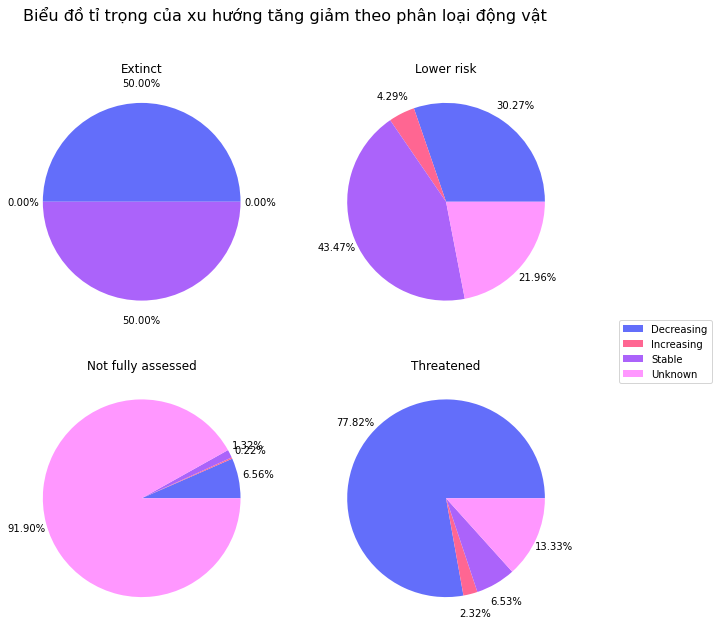

In [20]:
fig, ax = plt.subplots(2, 2, figsize = (10, 10))
for i in range(4):
    temp = merge_data[merge_data['new_status'] == new_status[i]]
    temp = temp.groupby(['new_status', 'trend'])['count'].sum().reset_index(name = 'sum')
    ax[i // 2][i % 2].pie(temp['sum'], autopct='%.2f%%', labels = None, pctdistance=1.2, colors = colors)
    ax[i // 2][i % 2].set_title(new_status[i])
fig.legend(labels = trend.index, loc="right", bbox_to_anchor=(1.1, 0.5))
fig.suptitle('Biểu đồ tỉ trọng của xu hướng tăng giảm theo phân loại động vật', fontsize = 16)